<a id='top'></a>

# Explore Time Series Exercises

Remember to document your thoughts and any takeaways as you work through visualizations!

#### Using your store items data you prepped in lesson 2 exercises:

- [Split your data into train and test](#split)<br>
- [Validate your splits by plotting X_train and y_train](#validate)<br>
- [Plot the weekly average & the 7-day moving average. Compare the 2 plots.](#moving)<br>
- [Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.](#difference)<br>
- [Plot a time series decomposition.](#decomp)<br>
- [Create a lag plot (day over day).](#lag)<br>
- [Run a lag correlation.](#lag_corr)

#### Using your OPS data you prepped in lesson 2 exercises:

- [Split your data into train and test using the percent cutoff method.](#split2)<br>
- [Validate your splits by plotting X_train and y_train.](#validate2)<br>
- [Plot the weekly average & the 7-day moving average. Compare the 2 plots.](#moving2)<br>
- [Group the electricity consumption time series by month of year, to explore annual seasonality.](#season)<br>
- [Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.](#difference2)<br>
- [Plot a time series decomposition. Takeaways?](#decomp)<br>

#### If time:

- [For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.](#if_time)<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

import acquire
import prepare

In [2]:
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
df, sales_sum = prepare.prepare_sale()

In [4]:
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,total_sales
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-02 00:00:00+00:00,11.0,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Wednesday,9.24
2013-01-03 00:00:00+00:00,14.0,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Thursday,11.76
2013-01-04 00:00:00+00:00,13.0,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Friday,10.92
2013-01-05 00:00:00+00:00,10.0,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Saturday,8.40


In [5]:
df.dtypes

sale_amount       float64
sale_id            object
store_address      object
store_city         object
store_id           object
store_state        object
store_zipcode      object
item_brand         object
item_id            object
item_name          object
item_price        float64
item_upc12         object
item_upc14         object
month            category
weekday          category
total_sales       float64
dtype: object

<a id='split'></a>

## Split your data into train and test

In [6]:
df.index.value_counts

<bound method IndexOpsMixin.value_counts of DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-02 00:00:00+00:00',
               '2013-01-03 00:00:00+00:00', '2013-01-04 00:00:00+00:00',
               '2013-01-05 00:00:00+00:00', '2013-01-06 00:00:00+00:00',
               '2013-01-07 00:00:00+00:00', '2013-01-08 00:00:00+00:00',
               '2013-01-09 00:00:00+00:00', '2013-01-10 00:00:00+00:00',
               ...
               '2017-12-22 00:00:00+00:00', '2017-12-23 00:00:00+00:00',
               '2017-12-24 00:00:00+00:00', '2017-12-25 00:00:00+00:00',
               '2017-12-26 00:00:00+00:00', '2017-12-27 00:00:00+00:00',
               '2017-12-28 00:00:00+00:00', '2017-12-29 00:00:00+00:00',
               '2017-12-30 00:00:00+00:00', '2017-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='sale_date', length=913000, freq=None)>

In [7]:
# Since we have full year data from 2013-2017, we'll split off 2013-2016 as train and 2017 as test

train = df[:'2016'].total_sales.resample('D').sum() # This is up to, and including, 2016, which is different from the usual
test = df['2017':].total_sales.resample('D').sum()

# train = df[:'2016']
# test = df['2017']

<a id='validate'></a>

## Validate your splits by plotting X_train and y_train.

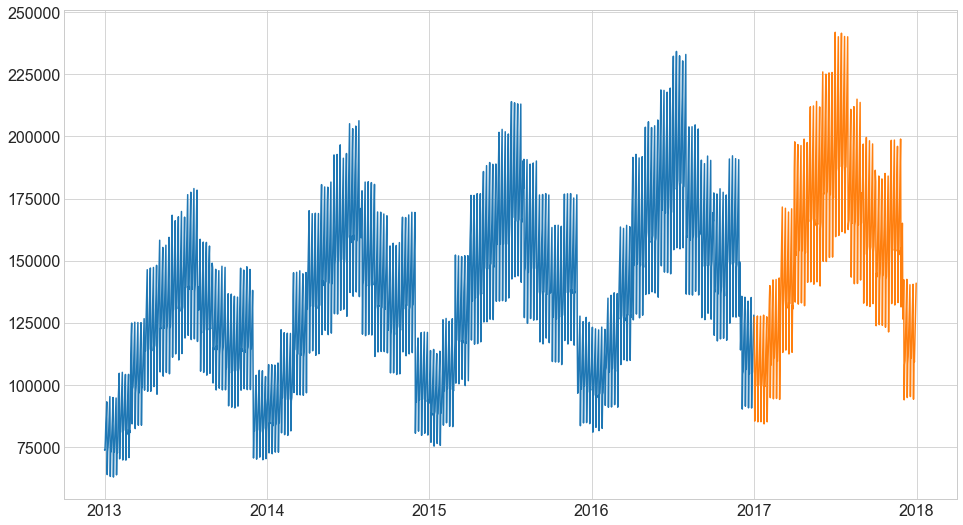

In [8]:
plt.plot(train) # we can also run it as: train.plot() and test.plot()
plt.plot(test)
plt.show()

<a id='moving'></a>

## Plot the weekly average & the 7-day moving average. Compare the 2 plots.

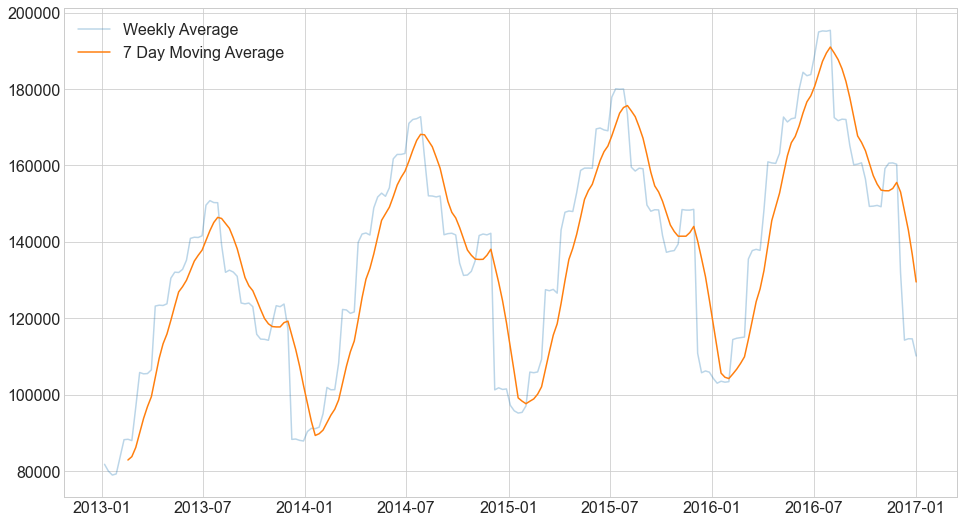

In [9]:
rolling_example = pd.DataFrame()
rolling_example['weekly_avg'] = train.resample('W').mean()
rolling_example['7_day_avg'] = rolling_example.weekly_avg.rolling(7).mean()

plt.plot(rolling_example.index, rolling_example.weekly_avg, alpha=.3)
plt.plot(rolling_example.index, rolling_example['7_day_avg'])
plt.legend(['Weekly Average', '7 Day Moving Average'])

plt.show()


##### The charts are pretty similar. The 7 Day Moving Average is a bit smoother though, I think that has to do with the granularity of data points with the weekly average.

In [10]:
y = train.resample('D').mean()

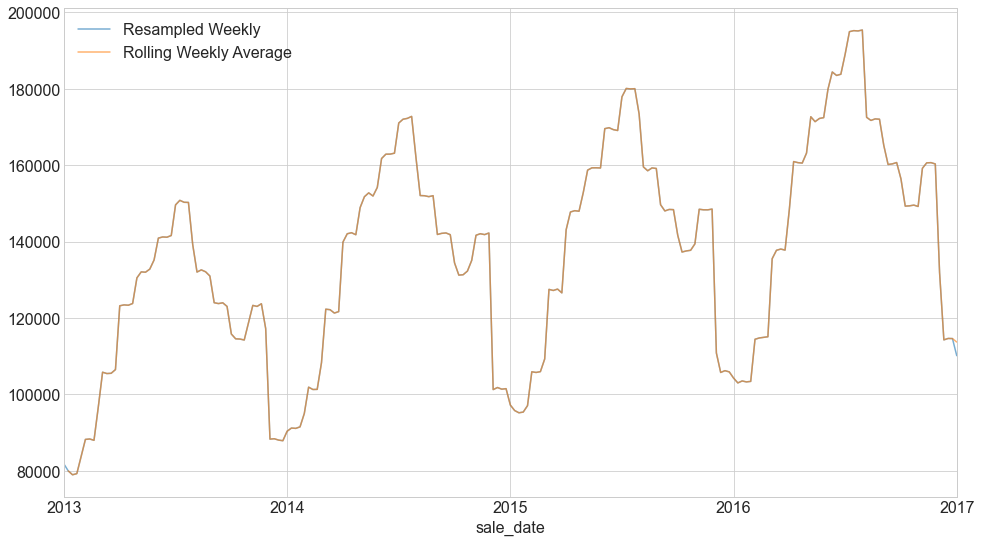

In [11]:
y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6)
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6)
plt.legend()

<a id='difference'></a>

### Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

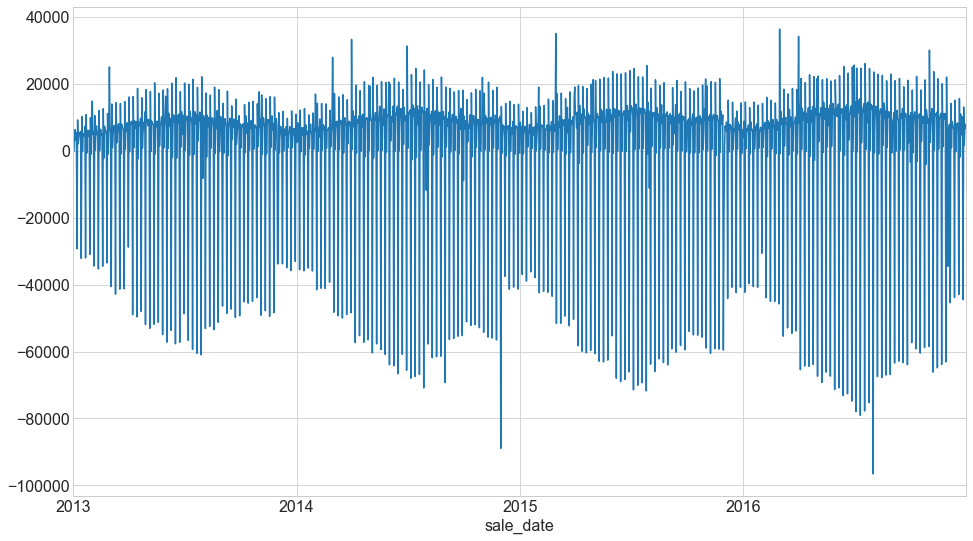

In [12]:
train.resample('D').mean().diff().plot()

plt.show()

##### There are some interesting spikes and dips in the data. These might note big days prior to holidays, read store closures, or perhaps big sales/discounts.

<a id='decomp'></a>

### Plot a time series decomposition.

In [13]:
y = train.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

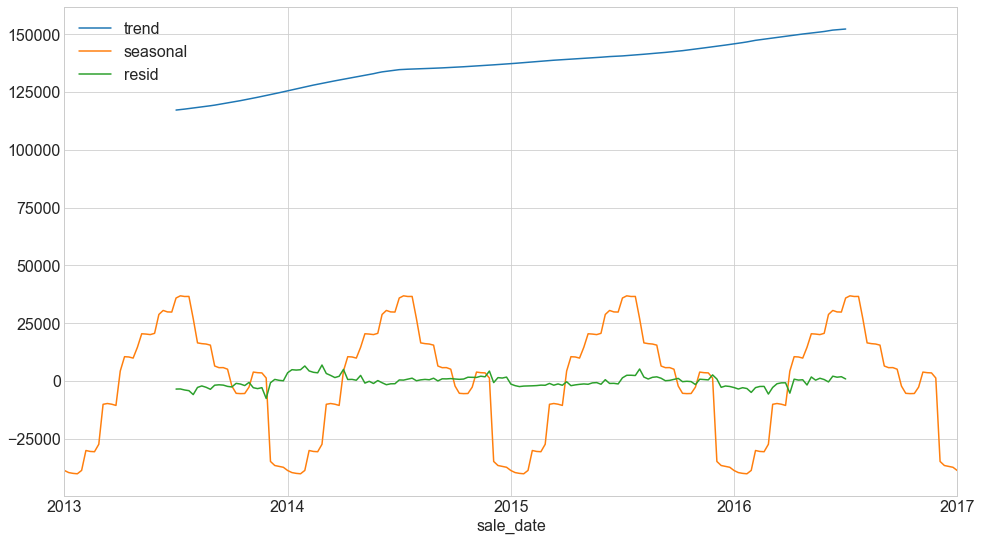

In [14]:
decomposition.iloc[:, 1:].plot()

plt.show()

In [15]:
sm.__version__

'0.11.1'

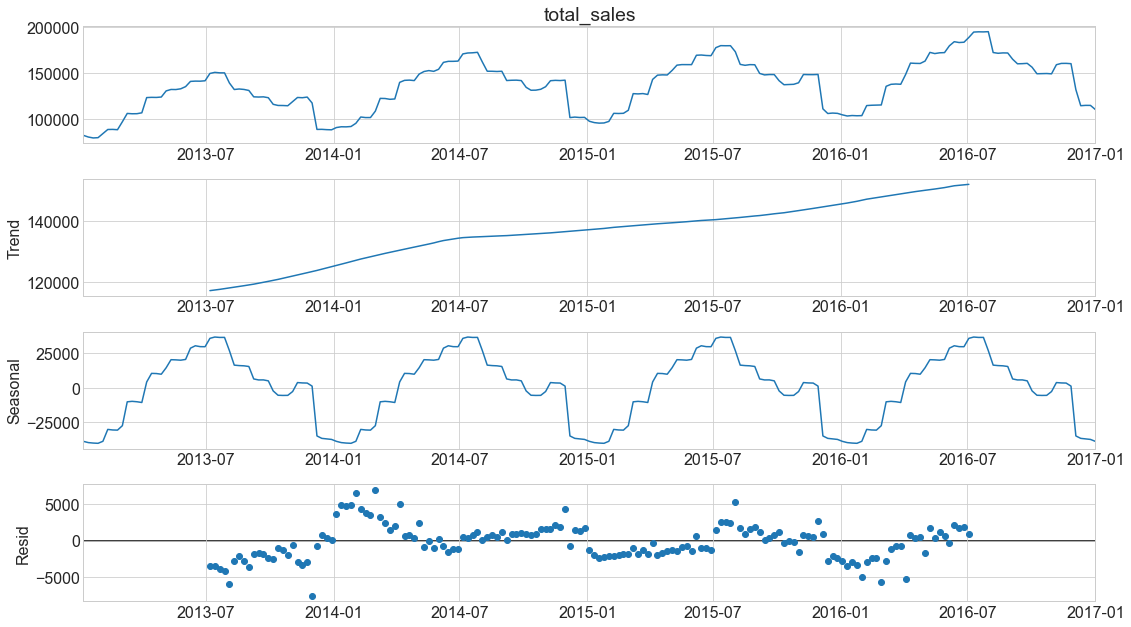

In [16]:
sm.tsa.seasonal_decompose(y).plot()
None

##### The first thing you see is the top of the chart. There seems to be clear upward trend in total sales. From there your eyes are track to the seasonal lines, which outlines clear seasonality in the data. We see consistent ramps up throughout the summer months, then a spike again towards the holiday season.

<a id='lag'></a>

### Create a lag plot (day over day)

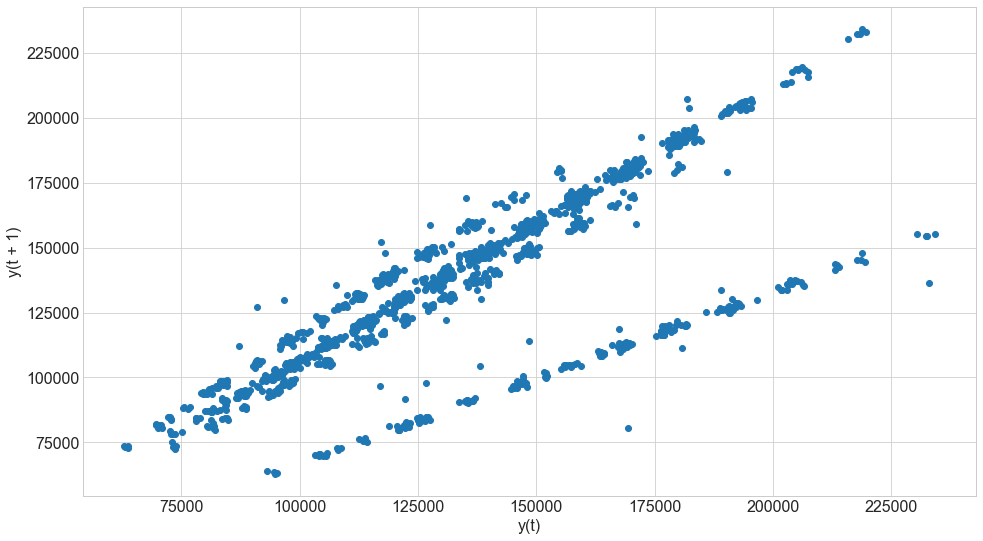

In [17]:
pd.plotting.lag_plot(train.resample('D').mean(), lag=1)

##### We see some linear relationships, but we'd need to get more granular to see which particular days are represented in the data.

Let's look at multiple lag periods for the montly data:

In [18]:
# fig, axs = plt.subplots(4, 3, sharex=True, sharey=True)
# for ax, lag in zip(axs.ravel(), range(1, 13)):
#     pd.plotting.lag_plot(monthly, lag=lag, ax=ax)
#     ax.set(title=lag, xlabel='', ylabel='')
# fig.tight_layout()

<a id='lag_corr'></a>

### Run a lag correlation

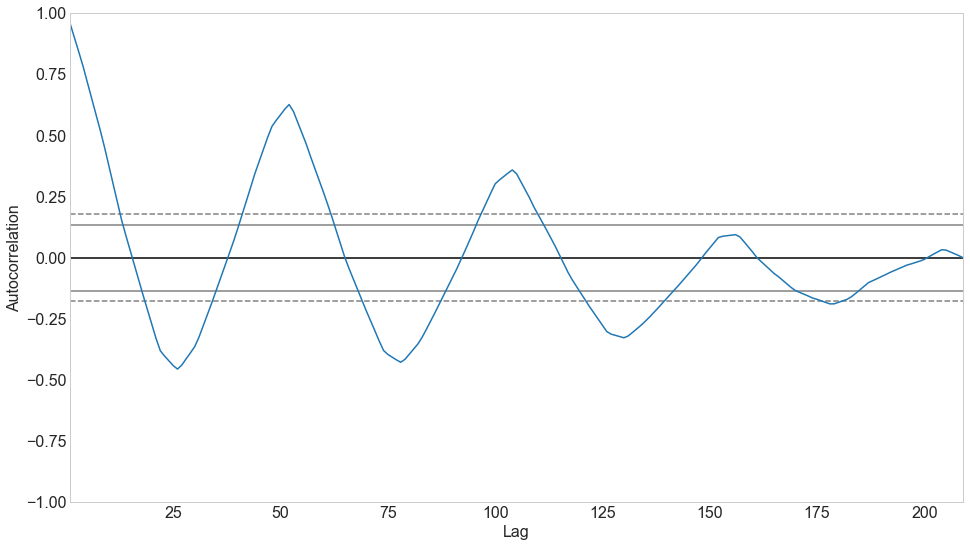

In [19]:
pd.plotting.autocorrelation_plot(train.resample("W").mean())

##### We do see that there are some seasonality elements in this data. 

<a id='split2'></a>

## Using your OPS data you prepped in lesson 2 exercises:

### Split your data into train and test using the percent cutoff method

In [20]:
df = prepare.prepped_energy()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Consumption  4383 non-null   float64 
 1   Wind         2920 non-null   float64 
 2   Solar        2188 non-null   float64 
 3   Wind+Solar   2187 non-null   float64 
 4   month        4383 non-null   category
 5   year         4383 non-null   category
dtypes: category(2), float64(4)
memory usage: 180.6 KB


In [22]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


In [23]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] 
test = df[test_start_index:]

<a id='validate2'></a>

### Validate your splits by plotting X_train and y_train

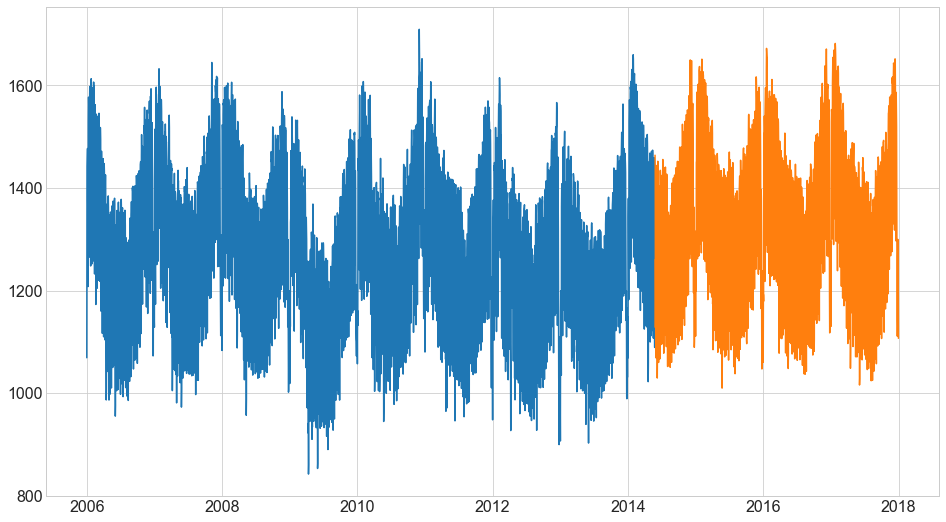

In [24]:
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

plt.show()

<a id='moving2'></a>

### Plot the weekly average & the 7-day moving average. Compare the 2 plots

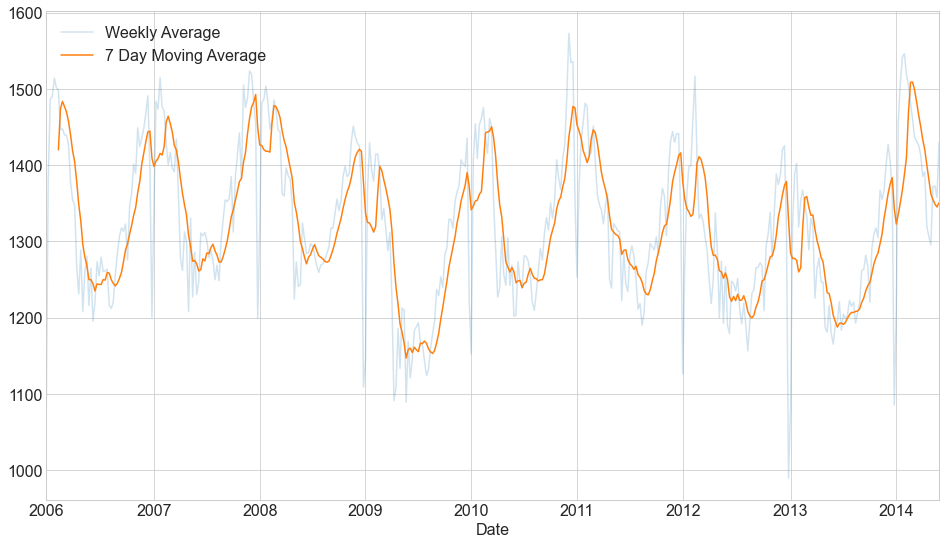

In [25]:
train.Consumption.resample('W').mean().plot.line(alpha=.2)
train.Consumption.resample('W').mean().rolling(7).mean().plot()

plt.legend(['Weekly Average', '7 Day Moving Average'])

plt.show()

##### We can see that the weekly average has higher and more frequent spikes - while the moving average is smoother.

##### From here we can see that there is clear seasonality to consumption, but at this point there doesn't seem to be trend emerging.


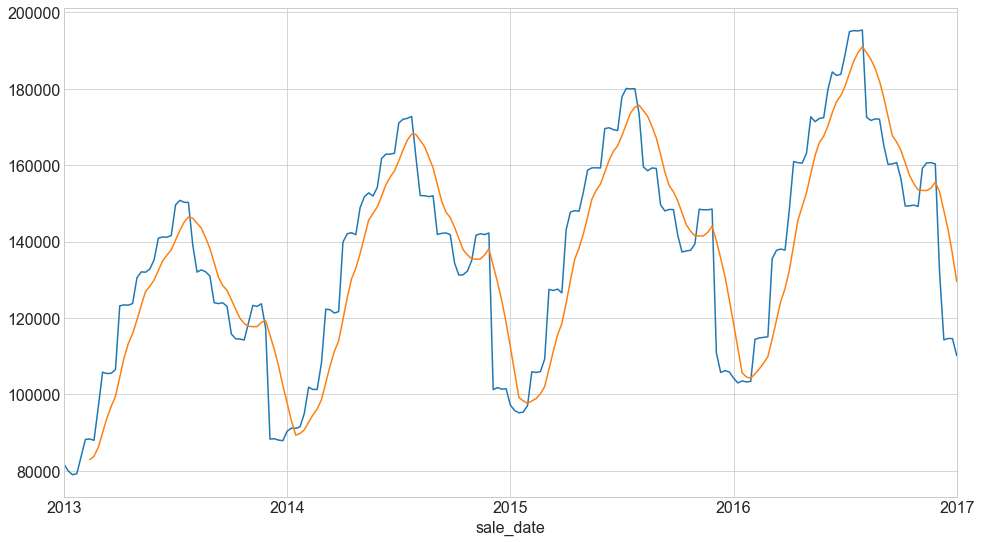

In [26]:
y.resample('W').mean().plot(label='Weekly Average')
y.rolling(7).mean().plot(label='Rolling 7 Day Average')

<a id='season'></a>

### Group the electricity consumption time series by month of year, to explore annual seasonality

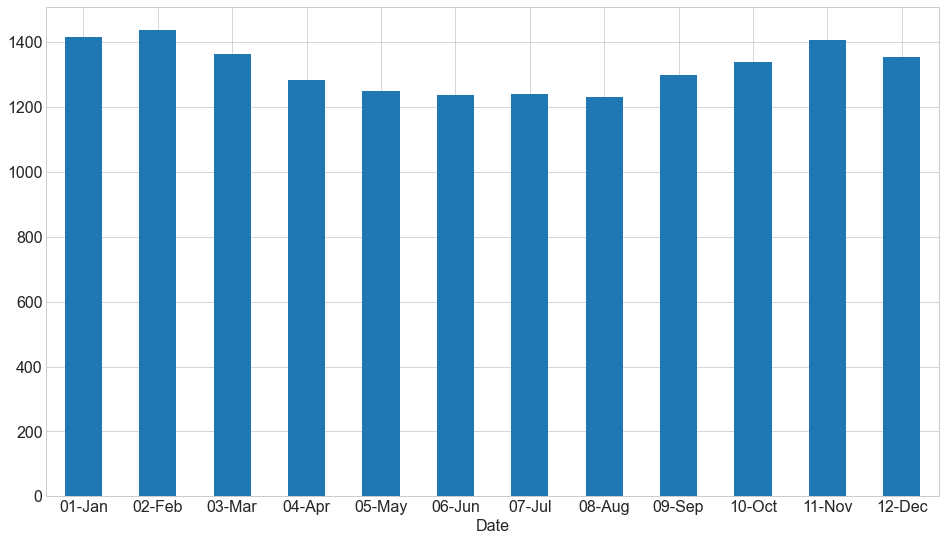

In [27]:
# train.groupby(train.index.strftime("%m-%b")).Consumption.mean().plot.bar()
# plt.xticks(rotation=45)

colors = ['b','y','b','b','b','b','b','b','b','b','b','b']

train.groupby(train.index.strftime('%m-%b')).Consumption.mean().plot.bar()
# unhide below to highlight the highest consumption month
#train.groupby(train.index.strftime('%m-%b')).Consumption.mean().plot.bar(color=colors)
plt.xticks(rotation=0)

plt.show()

##### Here we can see that during the fall and winter months we have peak usage. Though there isn't a real swing in the lowest month to the highest month.


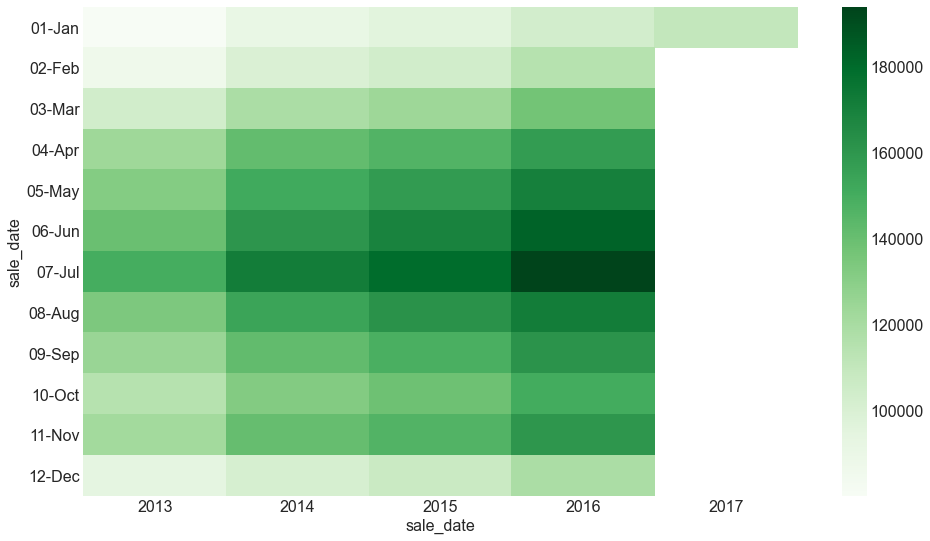

In [28]:
# Another way to look at it

table = y.groupby([y.index.strftime('%Y'), y.index.strftime('%m-%b')]).mean().unstack(0)
sns.heatmap(table, cmap='Greens')

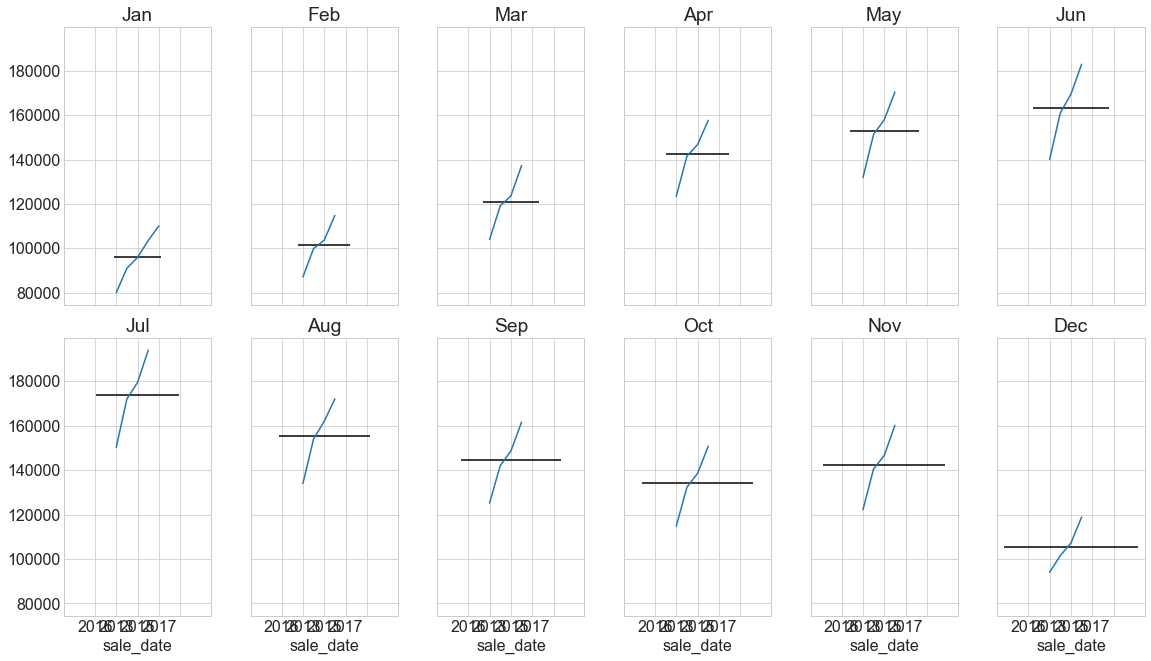

In [29]:
with plt.style.context('seaborn-whitegrid'):
    fig, axs = plt.subplots(2, 6, sharex=True, sharey=True)

fig.subplots_adjust(wspace=0)
fig.tight_layout()
for ax, (month, x) in zip(axs.ravel(), table.T.iteritems()):
    x.plot(ax=ax, title=month[3:])
    ax.hlines(x.mean(), *ax.get_xlim())

<a id='difference2'></a>

### Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition

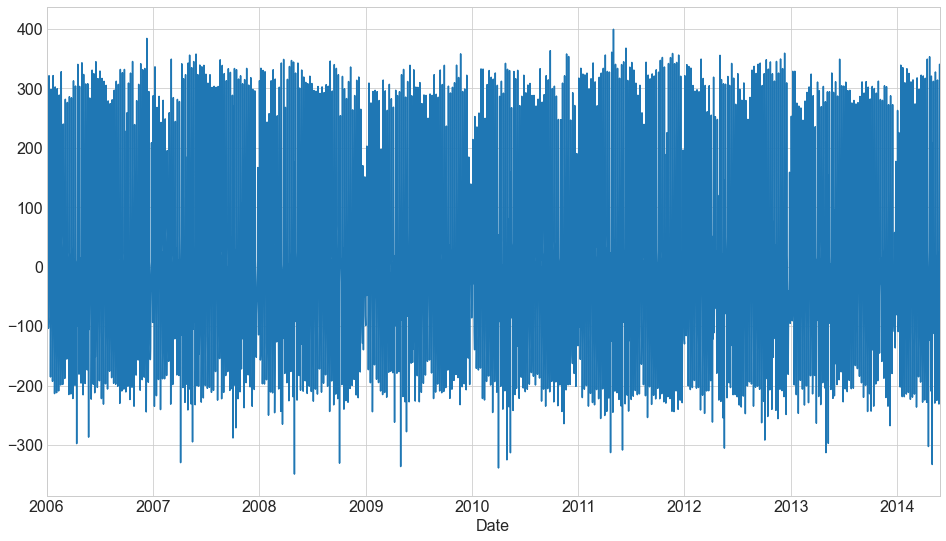

In [30]:
train.Consumption.resample("D").mean().diff().plot()


##### Although there seems to be a few outlier days, consumption is fairly regular.

<a id='decomp2'></a>

### Plot a time series decomposition. Takeaways?

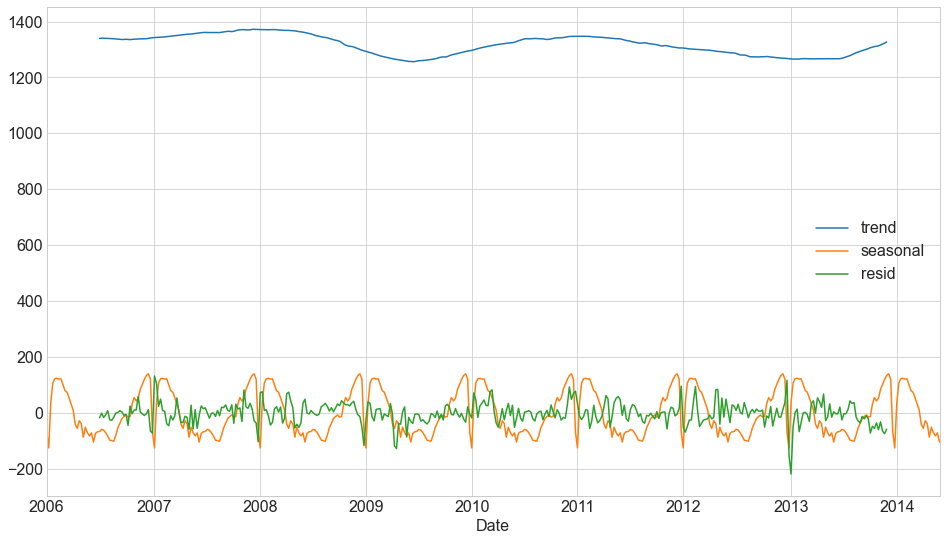

In [31]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

decomposition.iloc[:, 1:].plot()

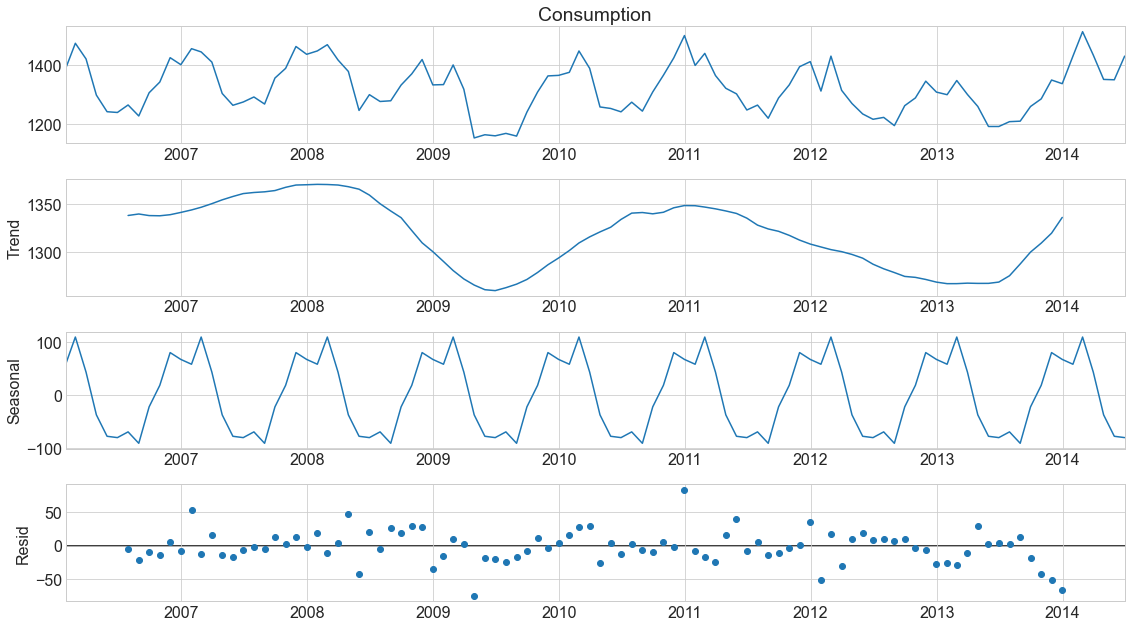

In [32]:
sm.tsa.seasonal_decompose(y.resample('M').mean()).plot()
None

##### The trend line appears to have cycles, while allow slightly tracking down. There might be some correlation with the temperature during those times. So, I'd say if we went and pulled that temperature data, we might be able to plot them together and see some correlation.

<a id='if_time'></a>

## If time